In [1]:
import pandas as pd
import numpy as np
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

## Подготовка

In [2]:
! gdown --id 1VqF7WqOntry-UE3dpAmR-lygv71wyHxx

Downloading...
From: https://drive.google.com/uc?id=1VqF7WqOntry-UE3dpAmR-lygv71wyHxx
To: /content/summer_camp_data.csv
3.96MB [00:00, 121MB/s]


In [3]:
with open('/content/summer_camp_data.csv', 'rb') as f:
    result = chardet.detect(f.read())

#df = pd.read_csv('/content/summer_camp_data.csv', index_col='date', encoding=result['encoding'])
df = pd.read_csv('/content/summer_camp_data.csv', encoding=result['encoding'])

In [4]:
df.head(5)

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
0,2020-05-11,google,organic,Не определено,Десктоп,no,no,3120,1233,5240,1048,525,90,86649.0
1,2020-05-11,yandex,cpc,Не определено,Мобайл,yes,no,3302,544,9930,1984,1416,217,244478.0
2,2020-05-11,google,cpc,Не определено,Мобайл,no,no,2970,1450,5460,1090,599,100,105150.0
3,2020-05-11,google,cpc,Не определено,Десктоп,no,no,1875,854,4250,848,407,71,79003.0
4,2020-05-11,yandex,organic,Не определено,Десктоп,no,no,2159,1000,4110,824,351,62,61861.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52724 entries, 0 to 52723
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                52724 non-null  object 
 1   source              52724 non-null  object 
 2   medium              52724 non-null  object 
 3   delivery_available  52724 non-null  object 
 4   device_type         52724 non-null  object 
 5   promo_activated     52724 non-null  object 
 6   filter_used         52724 non-null  object 
 7   pageviews           52724 non-null  int64  
 8   visits              52724 non-null  int64  
 9   productClick        52724 non-null  int64  
 10  addToCart           52724 non-null  int64  
 11  checkout            52724 non-null  int64  
 12  transactions        52724 non-null  int64  
 13  revenue             52724 non-null  float64
dtypes: float64(1), int64(6), object(7)
memory usage: 5.6+ MB


In [6]:
# Изменим к нужному типу данных 
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")

In [7]:
 print('Количество наблюдений:',df.shape[0], 'Количество признаков', df.shape[1])

Количество наблюдений: 52724 Количество признаков 14


In [8]:
print("Уникалье значения:")
print(df.nunique())

Уникалье значения:
date                    274
source                   24
medium                    6
delivery_available        3
device_type               3
promo_activated           2
filter_used               2
pageviews              4324
visits                 2205
productClick           1373
addToCart              1363
checkout               2022
transactions            497
revenue               21245
dtype: int64


In [9]:
print('Количество пропущенных значений:',df.isnull().sum().values.sum())

Количество пропущенных значений: 0


In [10]:
 print('Количество дублированных строк:',df.duplicated().sum())

Количество дублированных строк: 0


------

Какой рекламный канал принёс больше всего дохода за всё время? 

In [11]:
# поменяем экспоненциальную запись числа
pd.options.display.float_format = '{:.2f}'.format

In [12]:
df.groupby('source')['revenue'].agg(['sum']).sort_values(by = 'sum', ascending=False)

,sum
source,
yandex,467474813.00
google,456517017.00
(direct),238447371.25
admitad,65738858.00
eLama,16432390.00
cityads,14290767.00
promo,5363685.00
co-promo,3347826.00
newsletter,2225289.00


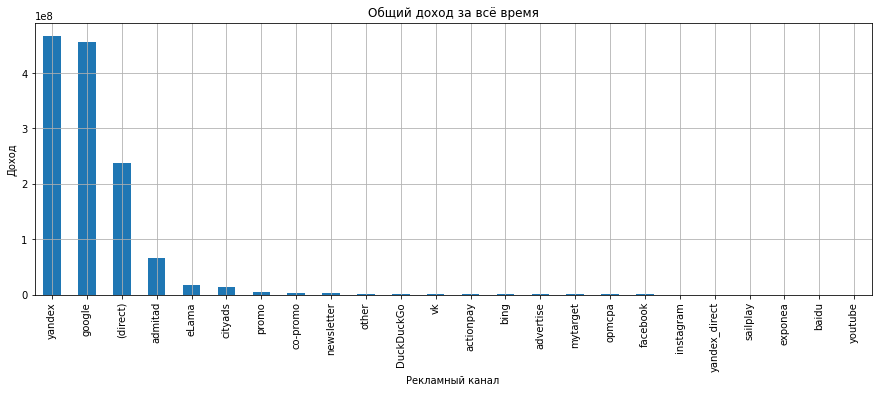

In [13]:
#Построим график общего дохода за всё время.
df.groupby('source')['revenue'].agg('sum').sort_values(ascending=False).plot(grid=True,figsize=(15, 5),kind='bar')
plt.title('Общий доход за всё время')
plt.ylabel('Доход')
plt.xlabel('Рекламный канал')
plt.show()

## Вывод

yandex принёс больше всего дохода за всё время.

------

Как изменился средний чек транзакции после введения коронавирусных ограничений?

Как он изменился для пользователей, покупающих с промокодом и без? (параметр «promo_activated») 

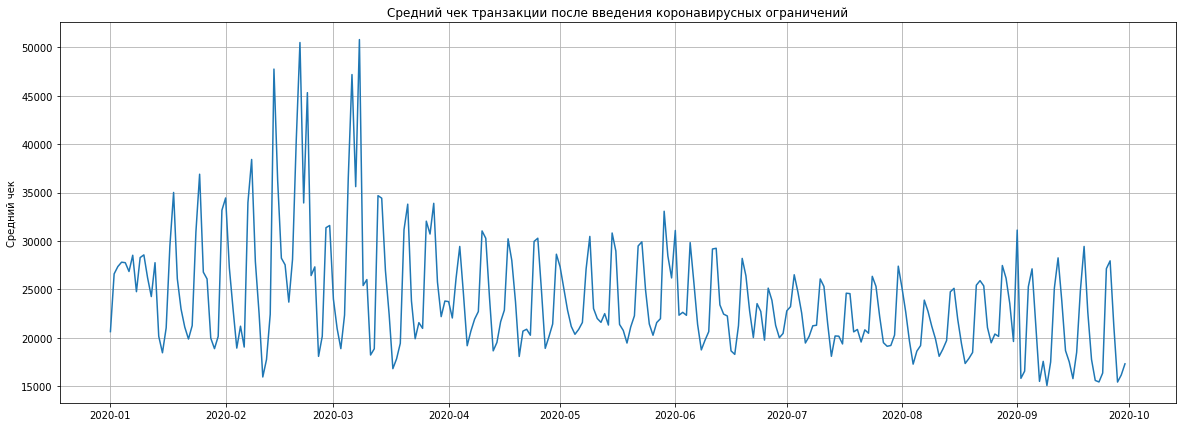

In [14]:
plt.figure(figsize=(20, 7))
plt.plot(df.groupby('date')['revenue'].agg(['mean']))
plt.title('Cредний чек транзакции после введения коронавирусных ограничений')
plt.ylabel('Средний чек')
plt.grid(True)
plt.show()

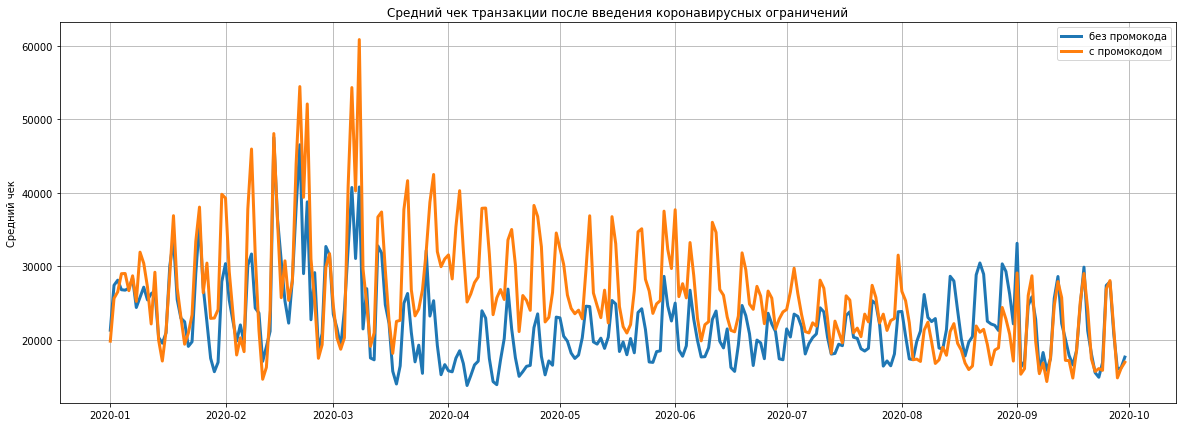

In [15]:
plt.figure(figsize=(20, 7))
plt.plot(df[df['promo_activated'] == 'no'].groupby('date')['revenue'].agg(['mean']), label="без промокода", lw=3)
plt.plot(df[df['promo_activated'] == 'yes'].groupby('date')['revenue'].agg(['mean']), label="с промокодом", lw=3)

plt.title('Cредний чек транзакции после введения коронавирусных ограничений')
plt.ylabel('Средний чек')
plt.grid(True)
plt.legend()
plt.show()

## Вывод

По графику видим, что наибольший средний чек приходится на период начало февраля-начало марта. Это может быть связано с какой-либо проводимой акцией в этот период. Ограничения ввели в марте. Первые несколько месяцев после введения ограничений средний чек остается примерно на одном уровне. Далее, когда ограничения приобретают затяжной характер, средний чек начинает падать, так как население начинает сокращать свои расходы. С промокодом средний чек практически на всем представленном периоде выше, чем без промокода, однако динамика изменения его примерно совпадает со средним чеком без промокода.

----

Можно ли с уверенностью в 95% сказать, что CR (коэффициент конверсии в
транзакцию) в выходные дни отличается от CR в будние дни?

In [16]:
#Определим будние и выходные дни по дню недели.
df['dayofweek']=df['date'].dt.dayofweek

In [17]:
df['cr_weekdays'] = (df[df['dayofweek'] < 5].transactions / df[df['dayofweek'] < 5].visits)* 100
df['cr_weekend'] = (df[df['dayofweek'] > 4].transactions / df[df['dayofweek'] > 4].visits)* 100

Мы знаем сколько визитов дал определённый источник трафика, можно посчитать конверсию именно для него: поделить на число таких визитов количество совершенных во время них транзакций.

pageviews и productClick часто равны нулю, по данным фичам конверсию считать не будем

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


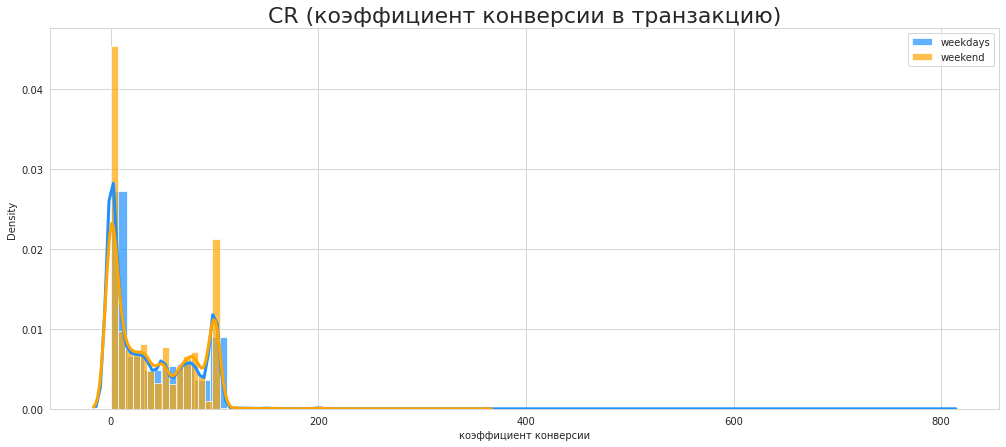

In [18]:
fig = plt.figure(figsize=(17, 7))
sns.set_style('whitegrid')
sns.distplot(df.cr_weekdays, color="dodgerblue", label="weekdays", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.cr_weekend, color="orange", label="weekend", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})

plt.title('CR (коэффициент конверсии в транзакцию)', fontsize =22)
plt.xlabel('коэффициент конверсии')
plt.legend()
plt.show()

в некоторых случаях конверсия больше 100%, т.к. при одном визите могут быть несколько транзакций. Выглядит страшно.

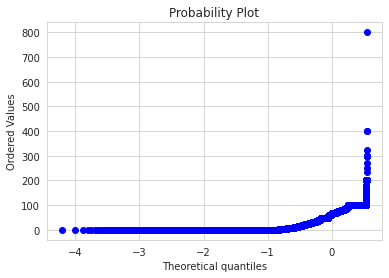

In [19]:
# Проверка распределения на нормальность. 
import pylab
import scipy.stats as stats

stats.probplot(df.cr_weekdays, dist = "norm",plot=pylab)

pylab.show()

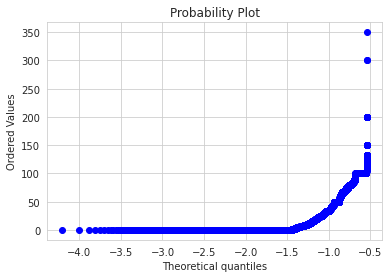

In [20]:
stats.probplot(df.cr_weekend, dist = "norm",plot=pylab)
pylab.show()

Оба распределения не являются нормальными, применим U-критерий Манна-Уитни.

Нулевая гипотеза звучит так: распределения одинаковые, альтернативная гипотеза ей противоположна: распределения отличаются друг от друга.

alpha возьмём 0.05

In [21]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(df.cr_weekdays, df.cr_weekend)
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Statistics=862696187.500, p-value=0.000
Отвергаем нулевую гипотезу


p-value ниже уровня значимости. Назвать их одинаковыми нельзя.

## Вывод
CR в выходные дни отличается от CR в будние дни!

----

Вам необходимо спрогнозировать объем дохода, полученного с
пользователей, приведенных на сайт контекстной рекламой (medium = cpc)
на полгода вперед.
Опишите, как бы вы подошли к этой задаче и какие дополнительные
данные вам понадобятся?

In [22]:
df_cpc = df[df['medium'] == 'cpc']

In [23]:
df_cpc = df.groupby('date')['revenue'].agg(['sum']).sort_values(by = 'sum', ascending=False)

In [24]:
df_cpc = df_cpc.resample('1D').sum()

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(df_cpc)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [26]:
df_cpc['sum_mean'] = df_cpc.rolling(10).mean()

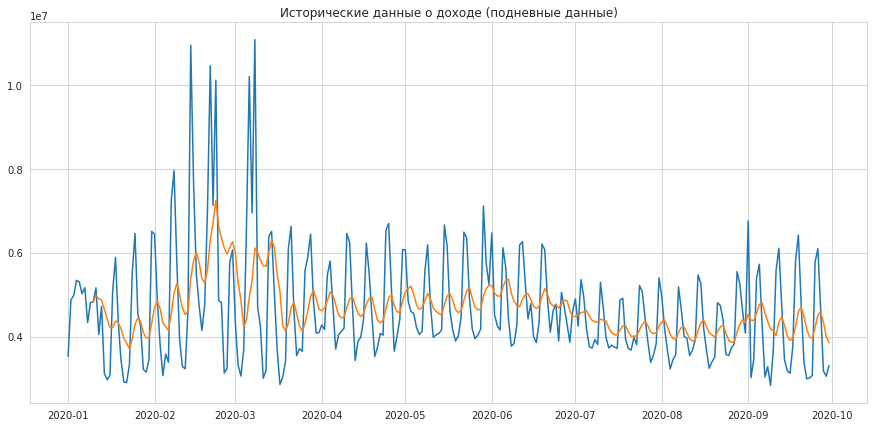

In [27]:
plt.figure(figsize=(15, 7))
plt.plot(df_cpc)
plt.title('Исторические данные о доходе (подневные данные)')
plt.grid(True)
plt.show()

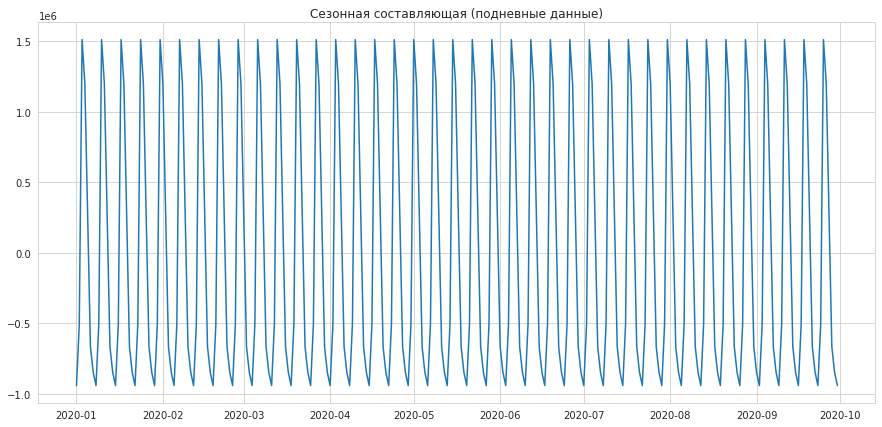

In [28]:
plt.figure(figsize=(15, 7))
plt.plot(decomposed.seasonal)
plt.title('Сезонная составляющая (подневные данные)')
plt.grid(True)
plt.show()

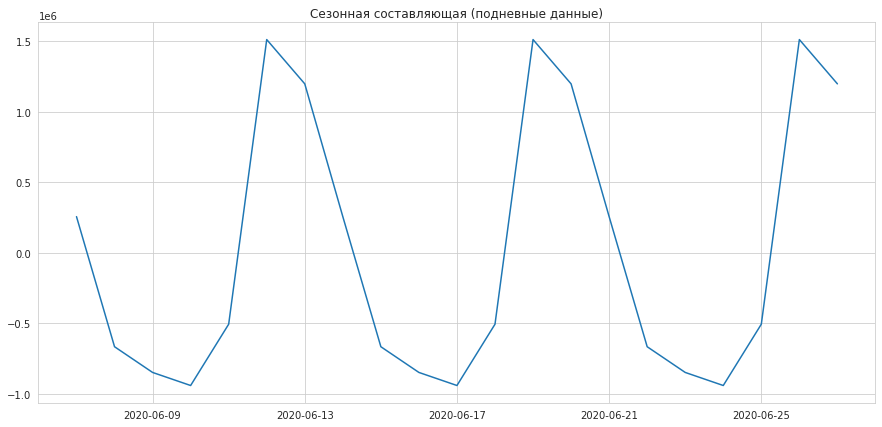

In [29]:
plt.figure(figsize=(15, 7))
plt.plot(decomposed.seasonal['2020-06-07':'2020-06-27'])
plt.title('Сезонная составляющая (подневные данные)')
plt.grid(True)
plt.show()

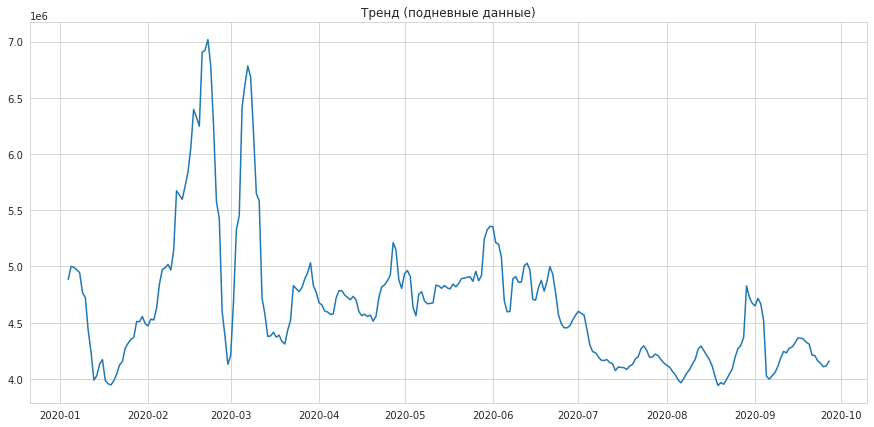

In [30]:
plt.figure(figsize=(15, 7))
plt.plot(decomposed.trend)
plt.title('Тренд (подневные данные)')
plt.grid(True)
plt.show()

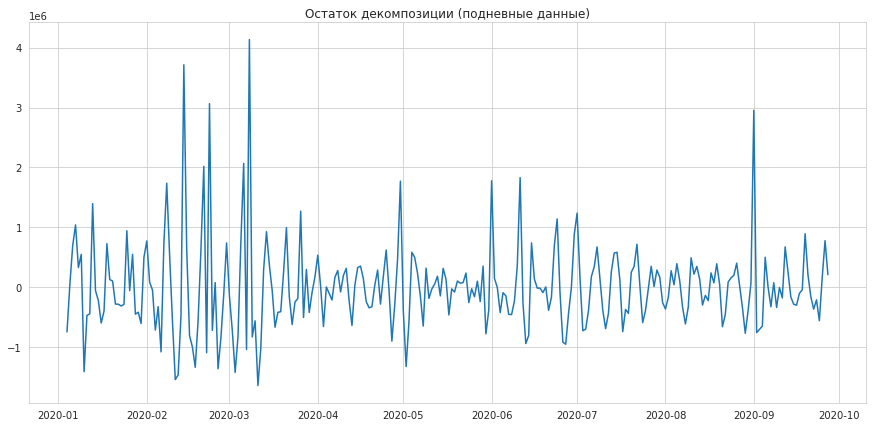

In [31]:
plt.figure(figsize=(15, 7))
plt.plot(decomposed.resid)
plt.title('Остаток декомпозиции (подневные данные)')
plt.grid(True)
plt.show()

##Вывод
По выходным дням доход растет, это доказывает циклично повторяющиеся закономерность.

Тред показывает общую тенденцию к снижению дохода.

Чтобы спрогнозировать объем дохода, полученного с пользователей, приведенных на сайт контекстной рекламой, необходимо определить конверсию пришедших на сайт по контекстной рекламе пользователей от количества размещенной контекстной рекламы и конверсию транзакций от числа пришедших на сайт по контекстной рекламе пользователей (по данным за последние 3 месяца). Далее высчитываем средний чек одной транзакции за последние 3 месяца. Для прогноза необходимо планируемый объем контекстной рекламы на 6 месяцев умножить на конверсию пришедших пользователей по контекстной рекламе. Таким образом мы определим возможное количество посетителей через планируемую контекстную рекламу. Далее возможное количество посетителей умножаем на конверсию числа транзакций от числа посетителей через контекстную рекламу. Таким образом, мы определим возможное количество транзакций. Определенное количество возможных транзакций умножаем на средний чек транзакции. Это и будет прогнозируемой выручкой. Можно спрогнозировать диапазон выручки, сделав поправку среднего значения на коэффициент отличия среднего значения конверсии от максимального и минимального значений.